In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
import os
import time

# 文件路径配置
depression_path = "E:/comorbidity/models/multi_features/emb-cn-mentalbert_共病.csv"
scale_path = "E:/comorbidity/models/症状_BSI/emb-cn-mentalbert_BSI.csv"
output_path = "similarity_results_共病_BSI.csv"

print(f"开始读取数据: {depression_path} 和 {scale_path}")
# 读取抑郁数据 (95163x768)，跳过表头
depression_embeddings = pd.read_csv(depression_path, header=0).values.astype(np.float32)
# 读取量表数据 (18x768)，跳过表头
scale_embeddings = pd.read_csv(scale_path, header=0).values.astype(np.float32)

print(f"数据维度: {depression_embeddings.shape}")
print(f"量表数据维度: {scale_embeddings.shape}")

print("开始归一化处理...")
# L2归一化
# depression_norm = normalize(depression_embeddings)
# scale_norm = normalize(scale_embeddings)

print("开始计算余弦相似度...")
start_time = time.time()

# 使用sklearn的cosine_similarity计算相似度
# similarity_matrix = cosine_similarity(depression_norm, scale_norm)

similarity_matrix = cosine_similarity(depression_embeddings,scale_embeddings)

elapsed = time.time() - start_time
print(f"相似度计算完成，耗时: {elapsed:.2f}秒")

# 验证结果范围
min_val = np.min(similarity_matrix)
max_val = np.max(similarity_matrix)
print(f"相似度范围验证: 最小值={min_val:.4f}, 最大值={max_val:.4f}")

print("保存结果到CSV...")
# 创建结果DataFrame，列名为量表条目索引
columns = [f"scale_{i}" for i in range(1, 19)]
result_df = pd.DataFrame(similarity_matrix, columns=columns)

# 保存结果
result_df.to_csv(output_path, index=False)

print(f"计算完成！结果已保存至: {output_path}")
print(f"结果矩阵维度: {result_df.shape[0]}行 x {result_df.shape[1]}列")
print(f"输出文件大小: {os.path.getsize(output_path)/(1024**2):.2f} MB")
    

开始读取数据: E:/comorbidity/models/multi_features/emb-cn-mentalbert_共病.csv 和 E:/comorbidity/models/症状_BSI/emb-cn-mentalbert_BSI.csv
数据维度: (22346, 768)
量表数据维度: (18, 768)
开始归一化处理...
开始计算余弦相似度...
相似度计算完成，耗时: 0.06秒
相似度范围验证: 最小值=0.0794, 最大值=0.9528
保存结果到CSV...
计算完成！结果已保存至: similarity_results_共病_BSI.csv
结果矩阵维度: 22346行 x 18列
输出文件大小: 4.12 MB


In [ ]:
### 尝试了一下计算相似性分数的平均值

# import pandas as pd

# # 读取 CSV 文件
# df = pd.read_csv('E:/comorbidity/models/similarity_results_共病_BSI.csv') 

# # 计算每列的平均值
# column_means = df.mean()

# # 将结果转换为 DataFrame 并设置合适的列名
# result_df = pd.DataFrame(column_means, columns=['ratio']).reset_index()
# result_df.columns = ['symptom', 'ratio']

# # 保存为新的 CSV 文件
# result_df.to_csv('E:/comorbidity/models/average_similarity_共病_BSI.csv', index=False)

In [40]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('E:/comorbidity/models/similarity_results_共病_BSI.csv') 
# 设定阈值
# threshold = 0.3427724

# threshold = 0.3512772  #抑郁数据

# threshold = 0.3640192  #焦虑数据

threshold = 0.3130207  #共病数据


# 创建一个新的DataFrame用于存储标记结果
marked_df = pd.DataFrame()

# 遍历每一列，进行标记并添加到新DataFrame
for column in df.columns:
    # 对每列应用阈值判断，大于阈值标记为1，否则为0
    marked_df[column] = df[column].apply(lambda x: 1 if x > threshold else 0)

# 保存仅包含标记结果的CSV文件，不包含原始数据
marked_df.to_csv('comorbidity_symptom_frequency_BSI.csv', index=False)

In [41]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('comorbidity_symptom_frequency_BSI.csv')  # 将'your_file.csv'替换为你的 CSV 文件路径

# 计算每列中 1 出现的次数除以总行数的比值
result = df.apply(lambda col: col.value_counts().get(1, 0) / len(col))

# 打印结果
print(result)


# 也可以将结果保存到新的 CSV 文件
result.to_csv('comorbidity_ratio_result_BSI.csv', header=['ratio'])

scale_1     0.262105
scale_2     0.064620
scale_3     0.984292
scale_4     0.415600
scale_5     0.212477
scale_6     0.648259
scale_7     0.181196
scale_8     0.288016
scale_9     0.847534
scale_10    0.340240
scale_11    0.070706
scale_12    0.426296
scale_13    0.144411
scale_14    0.540857
scale_15    0.480489
scale_16    0.064620
scale_17    0.123646
scale_18    0.313971
dtype: float64


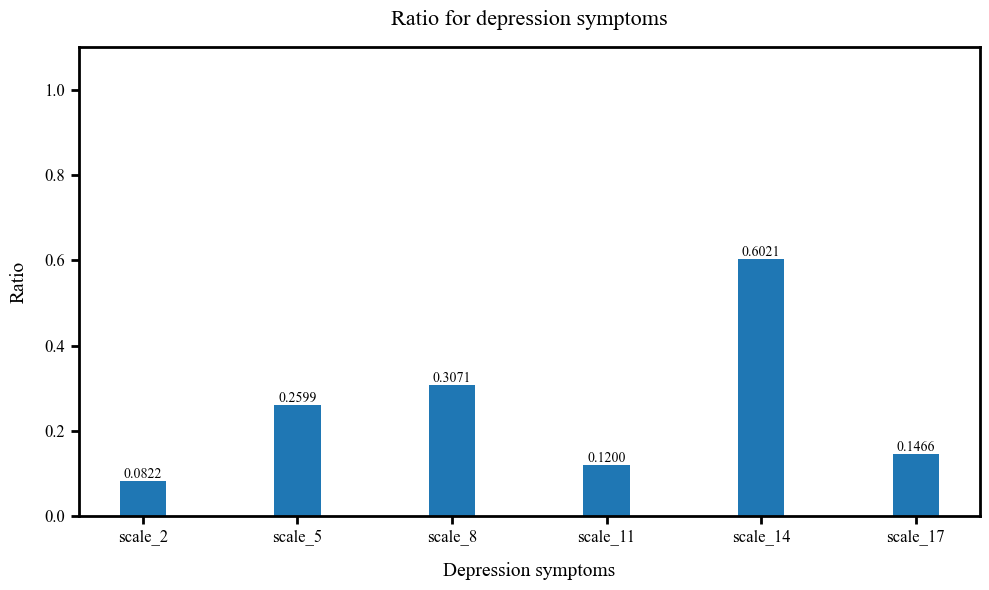

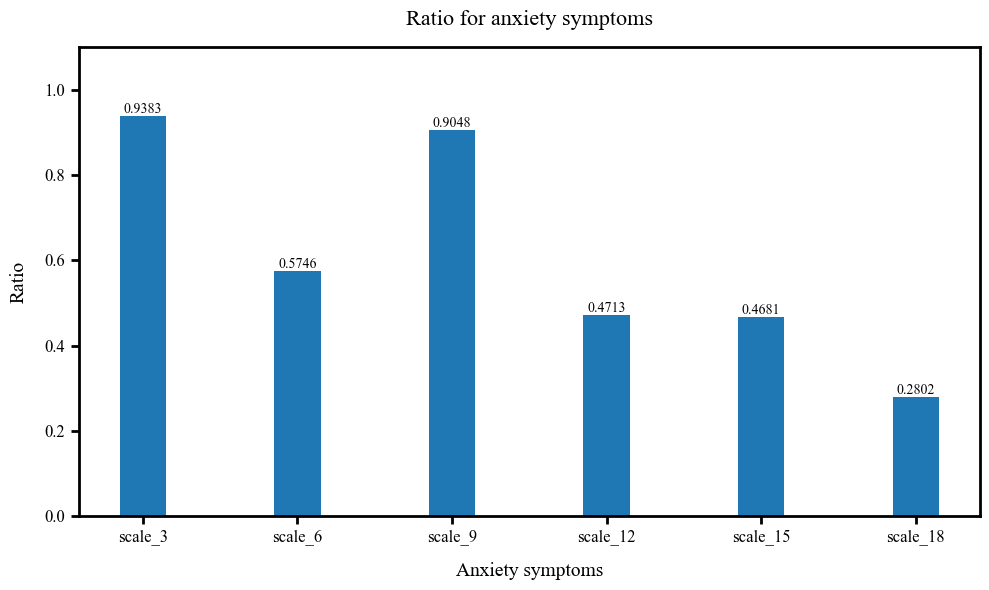

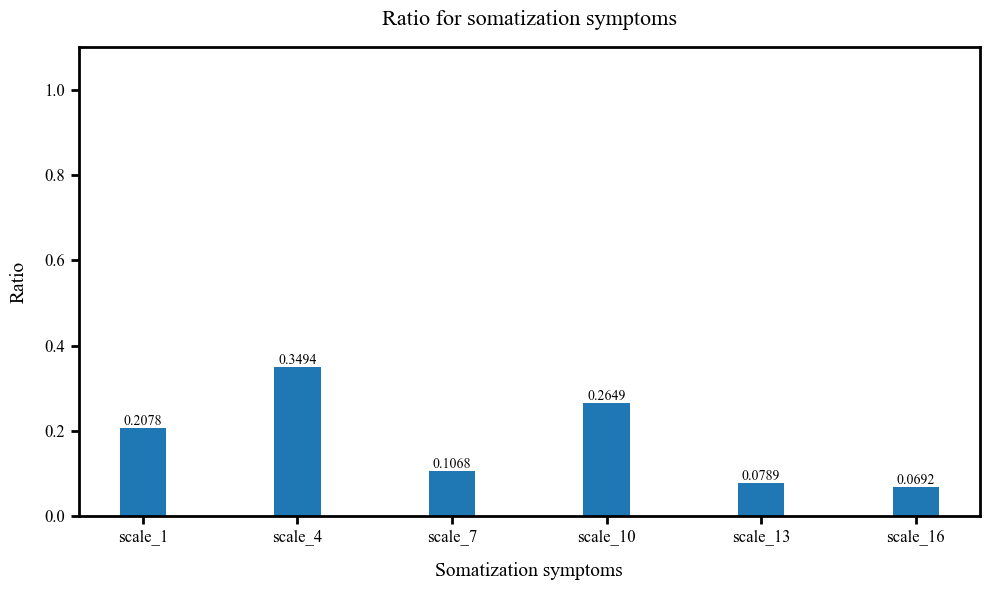

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置英文字体
plt.rcParams['font.sans-serif'] = ['Times New Roman']

# 读取 CSV 文件
df = pd.read_csv('depression_ratio_result_BSI.csv')

# 定义各类症状的列表
depression_symptoms = ['scale_2', 'scale_5', 'scale_8', 'scale_11', 'scale_14', 'scale_17']
anxiety_symptoms = ['scale_3', 'scale_6', 'scale_9', 'scale_12', 'scale_15', 'scale_18']
somatization_symptoms = ['scale_1', 'scale_4', 'scale_7', 'scale_10', 'scale_13', 'scale_16']

# 固定y轴最大值为1
max_ratio = 1
y_max = max_ratio * 1.1  # 增加一点缓冲

# 定义绘制柱状图的函数，调整图表尺寸和字体大小
def plot_symptom_chart(data, title, xlabel, y_max):
    # 调小图表尺寸为10x6（原为12x8）
    plt.figure(figsize=(10, 6))
    # 设置柱子宽度
    bars = plt.bar(data['symptom'], data['ratio'], width=0.3)
    
    # 在每个柱形上方添加数值标签，调整字体大小
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.4f}',
                 ha='center', va='bottom', fontsize=10)  # 减小标签字体
    
    # 设置标签和标题，调整字体大小
    plt.xlabel(xlabel, fontsize=14, labelpad=12)
    plt.ylabel('Ratio', fontsize=14, labelpad=12)
    plt.title(title, fontsize=16, pad=16)
    
    # 设置坐标轴刻度字体，调整大小
    plt.xticks(rotation=0, ha='center', fontsize=12)
    plt.yticks(fontsize=12)
    
    # 增大坐标轴线条粗细
    ax = plt.gca()
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    
    # 设置刻度线粗细
    ax.xaxis.set_tick_params(width=2, length=6)
    ax.yaxis.set_tick_params(width=2, length=6)
    
    # 设置y轴范围
    plt.ylim(0, y_max)
    
    # 调整布局
    plt.tight_layout()
    plt.show()

# 绘制抑郁症状柱状图
depression_df = df[df['symptom'].isin(depression_symptoms)]
plot_symptom_chart(depression_df, 'Ratio for depression symptoms', 'Depression symptoms', y_max)

# 绘制焦虑症状柱状图
anxiety_df = df[df['symptom'].isin(anxiety_symptoms)]
plot_symptom_chart(anxiety_df, 'Ratio for anxiety symptoms', 'Anxiety symptoms', y_max)

# 绘制躯体化症状柱状图
somatization_df = df[df['symptom'].isin(somatization_symptoms)]
plot_symptom_chart(somatization_df, 'Ratio for somatization symptoms', 'Somatization symptoms', y_max)


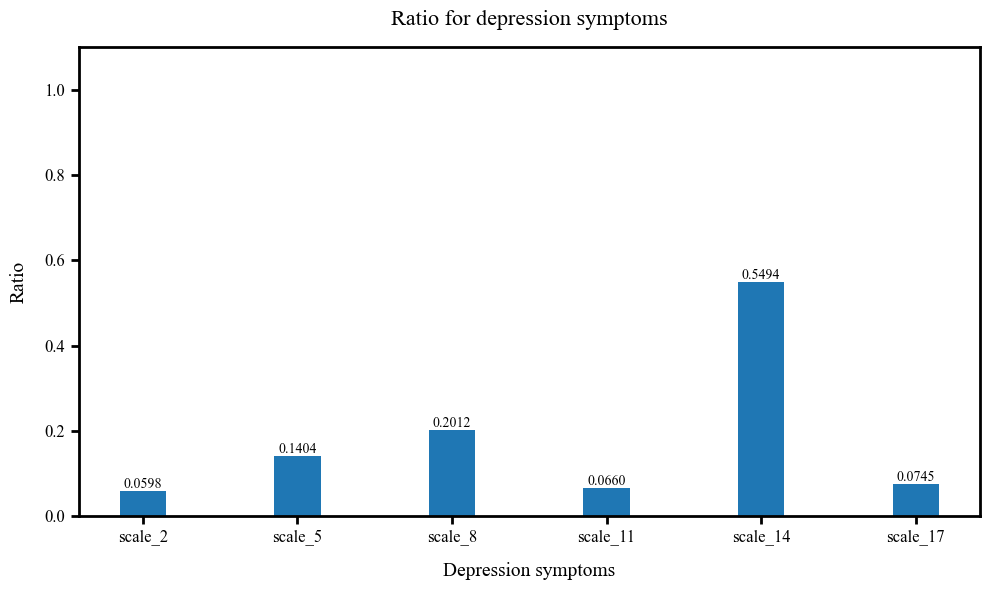

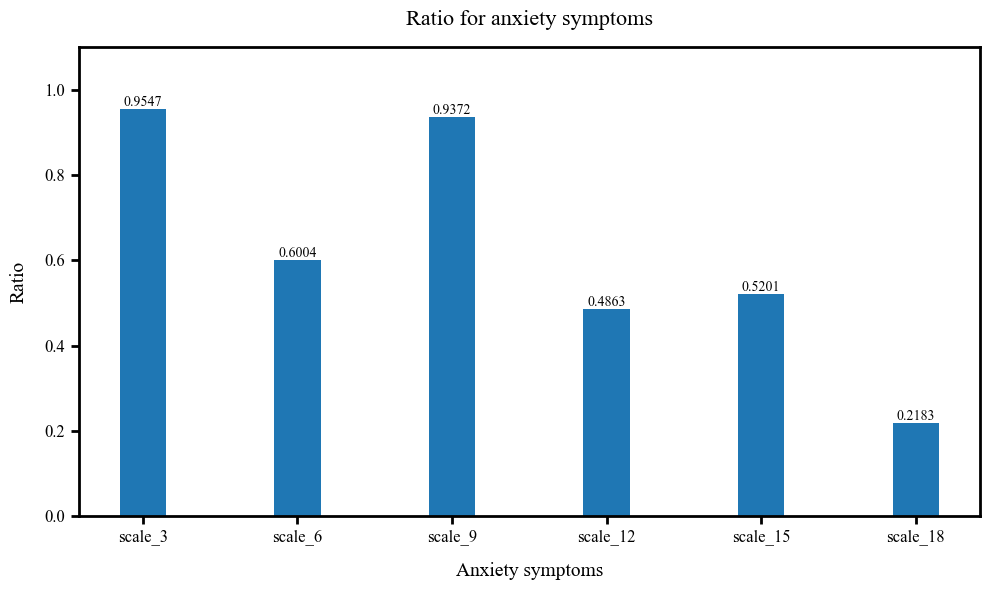

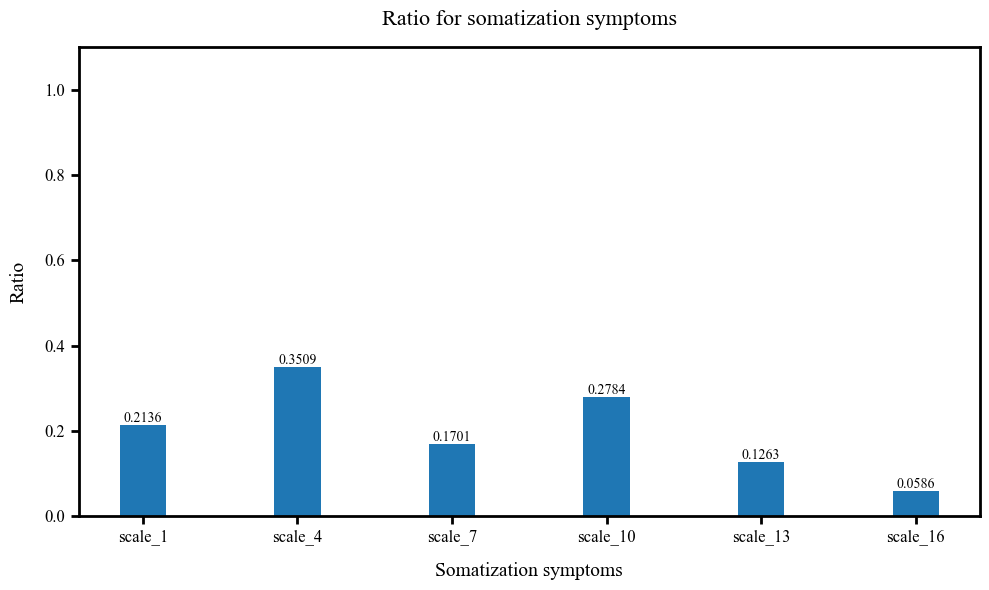

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置英文字体
plt.rcParams['font.sans-serif'] = ['Times New Roman']

# 读取 CSV 文件
df = pd.read_csv('anxiety_ratio_result_BSI.csv')

# 定义各类症状的列表
depression_symptoms = ['scale_2', 'scale_5', 'scale_8', 'scale_11', 'scale_14', 'scale_17']
anxiety_symptoms = ['scale_3', 'scale_6', 'scale_9', 'scale_12', 'scale_15', 'scale_18']
somatization_symptoms = ['scale_1', 'scale_4', 'scale_7', 'scale_10', 'scale_13', 'scale_16']

# 固定y轴最大值为1
max_ratio = 1
y_max = max_ratio * 1.1  # 增加一点缓冲

# 定义绘制柱状图的函数，调整图表尺寸和字体大小
def plot_symptom_chart(data, title, xlabel, y_max):
    # 调小图表尺寸为10x6（原为12x8）
    plt.figure(figsize=(10, 6))
    # 设置柱子宽度
    bars = plt.bar(data['symptom'], data['ratio'], width=0.3)
    
    # 在每个柱形上方添加数值标签，调整字体大小
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.4f}',
                 ha='center', va='bottom', fontsize=10)  # 减小标签字体
    
    # 设置标签和标题，调整字体大小
    plt.xlabel(xlabel, fontsize=14, labelpad=12)
    plt.ylabel('Ratio', fontsize=14, labelpad=12)
    plt.title(title, fontsize=16, pad=16)
    
    # 设置坐标轴刻度字体，调整大小
    plt.xticks(rotation=0, ha='center', fontsize=12)
    plt.yticks(fontsize=12)
    
    # 增大坐标轴线条粗细
    ax = plt.gca()
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    
    # 设置刻度线粗细
    ax.xaxis.set_tick_params(width=2, length=6)
    ax.yaxis.set_tick_params(width=2, length=6)
    
    # 设置y轴范围
    plt.ylim(0, y_max)
    
    # 调整布局
    plt.tight_layout()
    plt.show()

# 绘制抑郁症状柱状图
depression_df = df[df['symptom'].isin(depression_symptoms)]
plot_symptom_chart(depression_df, 'Ratio for depression symptoms', 'Depression symptoms', y_max)

# 绘制焦虑症状柱状图
anxiety_df = df[df['symptom'].isin(anxiety_symptoms)]
plot_symptom_chart(anxiety_df, 'Ratio for anxiety symptoms', 'Anxiety symptoms', y_max)

# 绘制躯体化症状柱状图
somatization_df = df[df['symptom'].isin(somatization_symptoms)]
plot_symptom_chart(somatization_df, 'Ratio for somatization symptoms', 'Somatization symptoms', y_max)


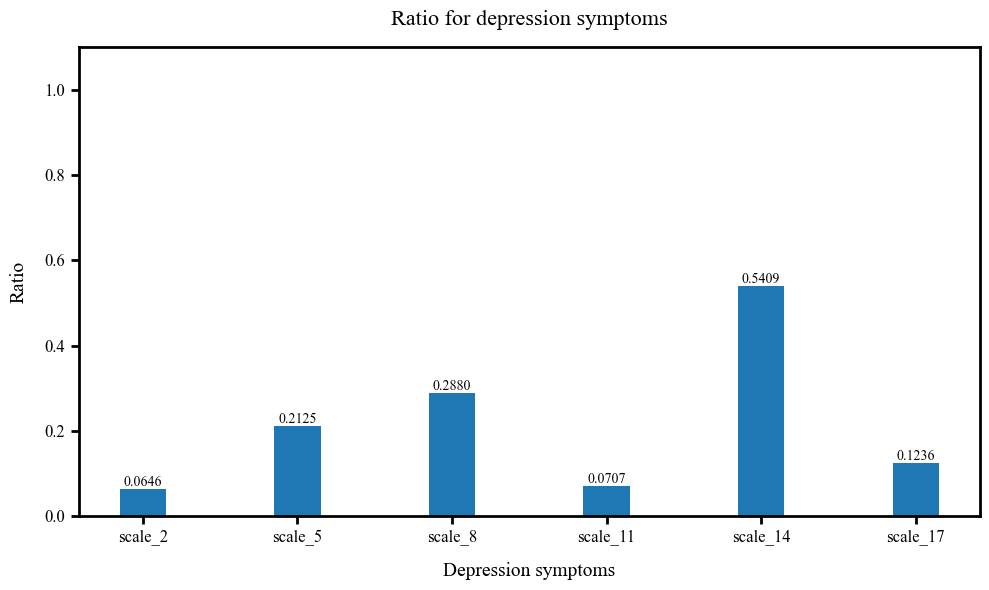

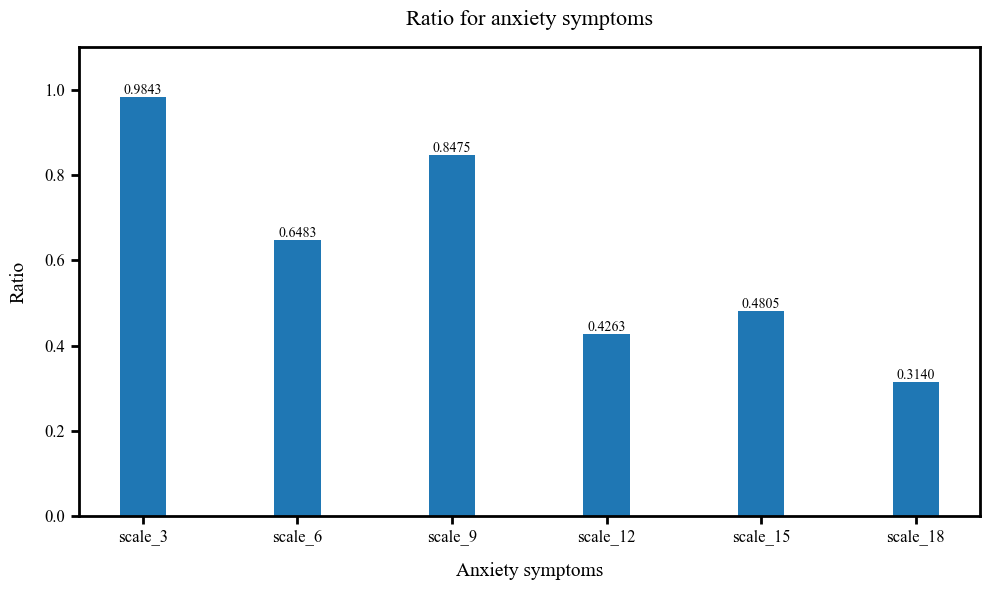

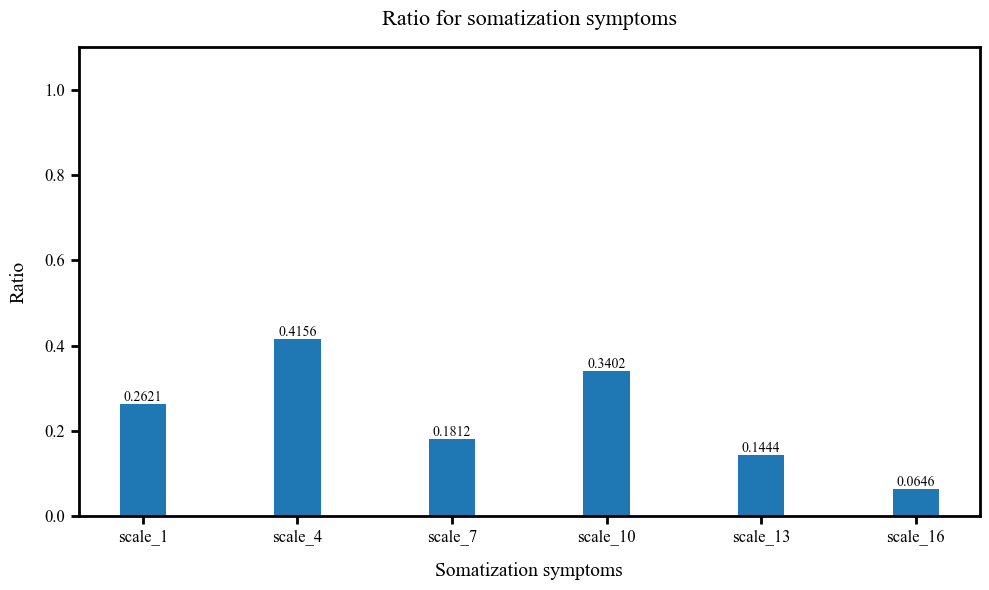

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置英文字体
plt.rcParams['font.sans-serif'] = ['Times New Roman']

# 读取 CSV 文件
df = pd.read_csv('comorbidity_ratio_result_BSI.csv')

# 定义各类症状的列表
depression_symptoms = ['scale_2', 'scale_5', 'scale_8', 'scale_11', 'scale_14', 'scale_17']
anxiety_symptoms = ['scale_3', 'scale_6', 'scale_9', 'scale_12', 'scale_15', 'scale_18']
somatization_symptoms = ['scale_1', 'scale_4', 'scale_7', 'scale_10', 'scale_13', 'scale_16']

# 固定y轴最大值为1
max_ratio = 1
y_max = max_ratio * 1.1  # 增加一点缓冲

# 定义绘制柱状图的函数，调整图表尺寸和字体大小
def plot_symptom_chart(data, title, xlabel, y_max):
    # 调小图表尺寸为10x6（原为12x8）
    plt.figure(figsize=(10, 6))
    # 设置柱子宽度
    bars = plt.bar(data['symptom'], data['ratio'], width=0.3)
    
    # 在每个柱形上方添加数值标签，调整字体大小
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.4f}',
                 ha='center', va='bottom', fontsize=10)  # 减小标签字体
    
    # 设置标签和标题，调整字体大小
    plt.xlabel(xlabel, fontsize=14, labelpad=12)
    plt.ylabel('Ratio', fontsize=14, labelpad=12)
    plt.title(title, fontsize=16, pad=16)
    
    # 设置坐标轴刻度字体，调整大小
    plt.xticks(rotation=0, ha='center', fontsize=12)
    plt.yticks(fontsize=12)
    
    # 增大坐标轴线条粗细
    ax = plt.gca()
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    
    # 设置刻度线粗细
    ax.xaxis.set_tick_params(width=2, length=6)
    ax.yaxis.set_tick_params(width=2, length=6)
    
    # 设置y轴范围
    plt.ylim(0, y_max)
    
    # 调整布局
    plt.tight_layout()
    plt.show()

# 绘制抑郁症状柱状图
depression_df = df[df['symptom'].isin(depression_symptoms)]
plot_symptom_chart(depression_df, 'Ratio for depression symptoms', 'Depression symptoms', y_max)

# 绘制焦虑症状柱状图
anxiety_df = df[df['symptom'].isin(anxiety_symptoms)]
plot_symptom_chart(anxiety_df, 'Ratio for anxiety symptoms', 'Anxiety symptoms', y_max)

# 绘制躯体化症状柱状图
somatization_df = df[df['symptom'].isin(somatization_symptoms)]
plot_symptom_chart(somatization_df, 'Ratio for somatization symptoms', 'Somatization symptoms', y_max)
